# UNIR DF

## Importem els paquets

In [2]:
import os
import pandas as pd
import missingno as msno

## Llegim els csv

In [3]:
df_all= pd.read_csv("C:/Users/annal/OneDrive/Escriptori/TFG/data def/df_all (2).csv", encoding="utf-8" ,sep=",",low_memory=False)
df_all

,Id,Fecha,Dia de la semana,Dia del mes,Hora,Estacion,PM1,PM2.5,PM10,NO,...,Temperatura,Humedad relativa,Presion,Radiacion,Precipitacion,Velocidad maxima del viento,Day,Year,Month,CH4
0,250003,15/10/2019,Martes,15,8,Viveros,NaN,NaN,NaN,7.0,...,14.8,53.0,1005.0,250.0,0.0,8.8,15.0,2019,10,NaN
1,250007,15/10/2019,Martes,15,12,Viveros,NaN,NaN,NaN,3.0,...,21.4,25.0,1006.0,750.0,0.0,2.5,15.0,2019,10,NaN
2,250008,15/10/2019,Martes,15,13,Viveros,NaN,NaN,NaN,3.0,...,22.7,25.0,1005.0,728.0,0.0,2.4,15.0,2019,10,NaN
3,250012,15/10/2019,Martes,15,17,Viveros,NaN,NaN,NaN,4.0,...,23.8,23.0,1003.0,127.0,0.0,6.4,15.0,2019,10,NaN
4,250014,15/10/2019,Martes,15,19,Viveros,NaN,NaN,NaN,19.0,...,19.8,32.0,1005.0,0.0,0.0,6.6,15.0,2019,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554141,169983,28/05/2022,Sabado,28,14,Nazaret Meteo,NaN,NaN,NaN,NaN,...,28.6,40.0,1009.0,987.0,0.0,7.8,NaN,2022,5,NaN
554142,169993,29/05/2022,Domingo,29,0,Nazaret Meteo,NaN,NaN,NaN,NaN,...,22.2,86.0,1005.0,1.0,0.0,1.1,NaN,2022,5,NaN
554143,169994,29/05/2022,Domingo,29,1,Nazaret Meteo,NaN,NaN,NaN,NaN,...,21.9,84.0,1005.0,1.0,0.0,1.6,NaN,2022,5,NaN
554144,169996,29/05/2022,Domingo,29,3,Nazaret Meteo,NaN,NaN,NaN,NaN,...,21.3,59.0,1003.0,1.0,0.0,2.3,NaN,2022,5,NaN


In [18]:
prob = df_all.rename(columns={'Fecha':'Data','Dia de la semana':'Dia de la setmana','Estacion':'Estació','Velocidad del viento':'Velocitat del vent','Direccion del viento':'Direcció del vent','Ruido':'Soroll','Humedad relativa':'Humitat relativa', 'Presion':'Presió', 'Radiacion':'Radiació',
                             'Precipitacion':'Precipitació','Velocidad maxima del viento':'Velocitat màxima del vent'})
prob=prob.drop(['Day','Year','Month'],axis=1)

<Axes: >

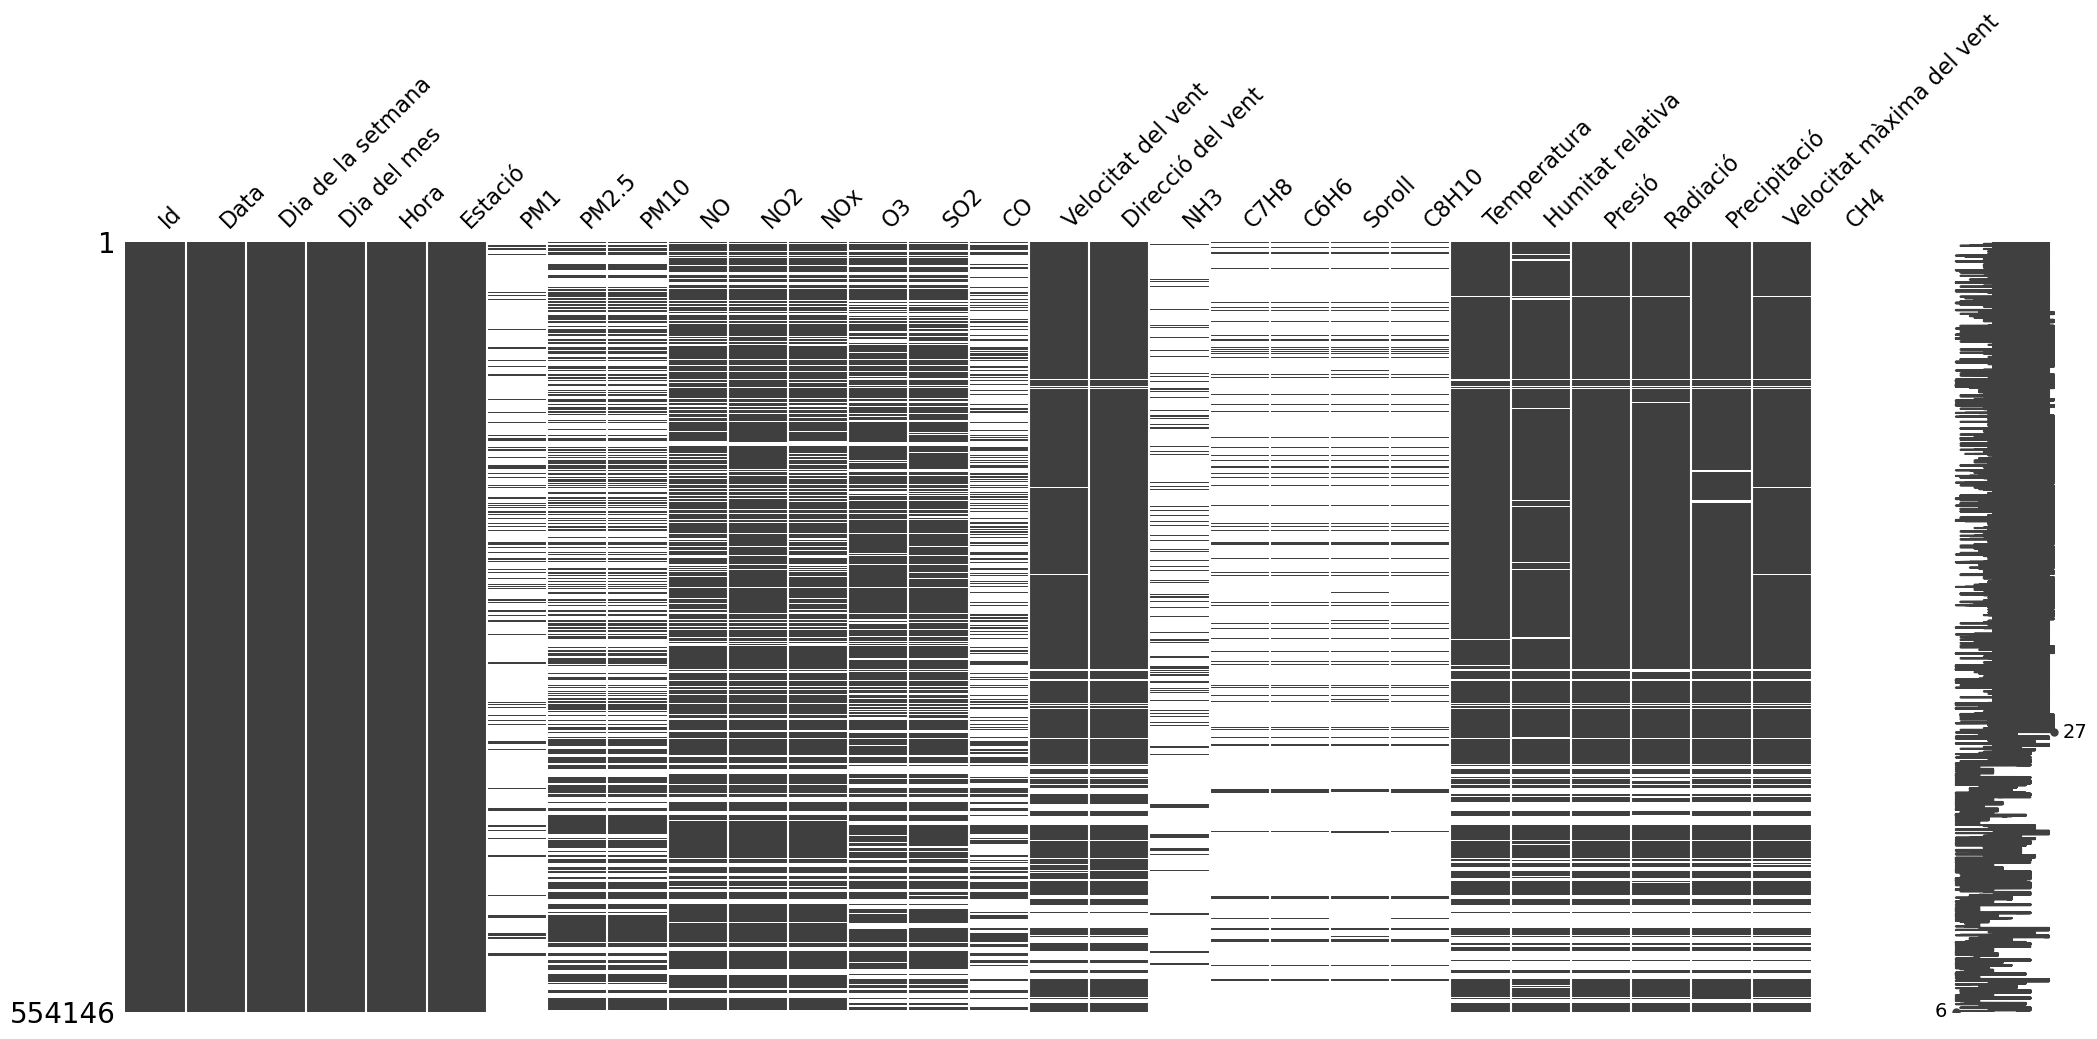

In [19]:
msno.matrix(prob)

In [98]:
df_all['Estacion'].unique()

array(['Viveros', 'Conselleria Meteo', 'Avda. Francia', 'Bulevard Sud',
       'Moli del Sol', 'Pista Silla', 'Politecnico', 'Valencia Centro',
       'Puerto Valencia', 'Nazaret Meteo', 'Puerto llit antic Turia',
       'Puerto Moll Trans. Ponent', 'Valencia Olivereta'], dtype=object)

In [101]:
df_all.columns

Index(['Id', 'Fecha', 'Dia de la semana', 'Dia del mes', 'Hora', 'Estacion',
       'PM1', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO',
       'Velocidad del viento', 'Direccion del viento', 'NH3', 'C7H8', 'C6H6',
       'Ruido', 'C8H10', 'Temperatura', 'Humedad relativa', 'Presion',
       'Radiacion', 'Precipitacion', 'Velocidad maxima del viento', 'Day',
       'Year', 'Month', 'CH4'],
      dtype='object')

In [102]:
for i in ['Viveros', 'Avda. Francia', 'Bulevard Sud',
       'Moli del Sol', 'Pista Silla', 'Politecnico', 'Valencia Centro',
        'Puerto llit antic Turia',
       'Puerto Moll Trans. Ponent']: 
    
    est=df_all.loc[df_all.loc[:,'Estacion']==i]
    est=est[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO']]
    print(i)
    d=est.describe()
    print(d)

Viveros
       PM2.5  PM10            NO           NO2           NOx            O3  \
count    0.0   0.0  58488.000000  58487.000000  58487.000000  60588.000000   
mean     NaN   NaN      7.268705     21.505497     32.469660     53.048822   
std      NaN   NaN     16.913484     18.745039     40.415056     29.174244   
min      NaN   NaN      1.000000      1.000000      2.000000      1.000000   
25%      NaN   NaN      2.000000      8.000000     11.000000     30.000000   
50%      NaN   NaN      3.000000     16.000000     20.000000     54.000000   
75%      NaN   NaN      5.000000     30.000000     37.000000     76.000000   
max      NaN   NaN    393.000000    160.000000    735.000000    156.000000   

                SO2   CO  
count  58484.000000  0.0  
mean       3.554254  NaN  
std        1.267747  NaN  
min        3.000000  NaN  
25%        3.000000  NaN  
50%        3.000000  NaN  
75%        4.000000  NaN  
max       28.000000  NaN  
Avda. Francia
              PM2.5          PM1

In [80]:
na_ratio = ((df_all.isnull().sum() / len(df_all))*100).sort_values(ascending = False)
print(na_ratio)

CH4                            99.999820
C6H6                           89.695134
C7H8                           89.651283
C8H10                          89.623493
NH3                            89.604003
Ruido                          89.336565
PM1                            84.754198
CO                             64.364806
PM10                           46.710073
PM2.5                          46.694373
Day                            36.358649
SO2                            28.136809
O3                             27.962667
NO                             23.133615
NOx                            23.133434
NO2                            20.001768
Humedad relativa               18.068523
Radiacion                      15.659050
Temperatura                    15.481660
Velocidad maxima del viento    15.228839
Precipitacion                  15.009402
Presion                        14.867021
Velocidad del viento           13.553287
Direccion del viento           13.124159
Fecha           

In [106]:
df = df_all.drop(df_all[df_all['Estacion']=='Conselleria Meteo'].index)
df = df.drop(df[df['Estacion']=='Nazaret Meteo'].index)
df = df.drop(df[df['Estacion']=='Puerto Valencia'].index)
df = df.drop(df[df['Estacion']=='Valencia Olivereta'].index)



In [7]:
df['Estacion'].unique()

array(['Viveros', 'Avda. Francia', 'Bulevard Sud', 'Moli del Sol',
       'Pista Silla', 'Politecnico', 'Valencia Centro',
       'Puerto llit antic Turia', 'Puerto Moll Trans. Ponent'],
      dtype=object)

In [107]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

CH4                            99.999768
C6H6                           86.763404
C7H8                           86.707077
C8H10                          86.671380
NH3                            86.646346
Ruido                          86.302821
PM1                            80.525023
CO                             54.976009
Day                            36.549918
PM10                           34.099812
PM2.5                          34.079646
Humedad relativa               20.266104
Temperatura                    17.297466
Radiacion                      17.133585
Velocidad maxima del viento    16.982453
Precipitacion                  16.777312
Presion                        16.650054
Velocidad del viento           14.868223
Direccion del viento           14.422475
SO2                            12.543984
O3                             12.055817
NO2                             4.144317
NO                              4.143390
NOx                             4.143158
Fecha           

In [115]:
from tqdm import tqdm
path="C:/Users/annal/OneDrive/Escriptori/TFG/pred/"
folder=os.listdir(path)
for p in tqdm(folder):
  
    n=p.split('.')
    n=n[0]
    if p=='PREDICCIONS_O3.csv':
        data= pd.read_csv(f"{path}{p}", encoding="utf-8" ,sep=";",decimal=".",low_memory=False)

    else: 
        data= pd.read_csv(f"{path}{p}", encoding="utf-8" ,sep=",",decimal=".",low_memory=False)

    data = data.drop(data[data['Estacion']=='Conselleria Meteo'].index)
    data = data.drop(data[data['Estacion']=='Nazaret Meteo'].index)
    data = data.drop(data[data['Estacion']=='Puerto Valencia'].index)
    data = data.drop(data[data['Estacion']=='Valencia Olivereta'].index)
    na_ratio = ((len(data) / len(df))*100)
    print(na_ratio)
    try: 
        df[n] = df.groupby('Id')[n].fillna(data[n])
    except:
        pass

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

1.2887971998794652


 10%|████████▎                                                                          | 1/10 [00:10<01:31, 10.19s/it]

2.8031339097378365


 30%|████████████████████████▉                                                          | 3/10 [00:14<00:25,  3.61s/it]

1.2299204932662664
1.6188776338054287


 40%|█████████████████████████████████▏                                                 | 4/10 [00:14<00:13,  2.25s/it]

1.618414037690364


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:15<00:15,  3.08s/it]


KeyError: 'Estacion'

In [ ]:
data=

df_uni=df.merge(data, how="left", on = ["Id"])
df_uni.loc[df_uni[f'{n}_x'].isna(),f'{n}_x']= df_uni[df_uni[f'{n}_y'].isna()][f"{n}_y"]
df_uni = df_uni[[i for i in df_uni.columns if not i.endswith("_y")]]
df_uni.columns = [i if not i.endswith("_x") else i[:-2] for i in df_uni.columns]


In [132]:
##def uni pred

from tqdm import tqdm
path="C:/Users/annal/OneDrive/Escriptori/TFG/pred/"
folder=os.listdir(path)
for p in tqdm(folder):

    n=p.split('.')
    n=n[0]
    print(n)

    if p=='O3.csv':
        data= pd.read_csv(f"{path}{p}", encoding="utf-8" ,sep=";",decimal=".",low_memory=False)
    elif p=='PM2.5.csv':
        n='PM2.5'
        data= pd.read_csv(f"{path}{p}", encoding="utf-8" ,sep=",",decimal=".",low_memory=False)
    
    else: 
        data= pd.read_csv(f"{path}{p}", encoding="utf-8" ,sep=",",decimal=".",low_memory=False)
    print(len(data) / len(df_all)*100)
    df_uni = df_all.merge(data[["Id",n,"Hora","Dia del mes", "Estacion","Year","Month"]],how="left", on=["Id","Hora","Dia del mes", "Estacion","Year","Month"])
    df_uni[f'{n}_x'] = df_uni[f'{n}_x'].fillna(df_uni[f'{n}_y'])
    df_uni = df_uni[[col for col in df_uni.columns if not col.endswith("_y")]]
    df_uni.columns = [col if not col.endswith("_x") else col[:-2] for col in df_uni.columns]
df_uni.to_csv(f'C:/Users/annal/OneDrive/Escriptori/TFG/pred/proba_reconstruccio.csv',sep=';',decimal=',',header=True, index=False)


  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

CO
1.0033456886813223


  9%|███████▌                                                                           | 1/11 [00:00<00:09,  1.06it/s]

Humedad relativa
2.182276872881876


 18%|███████████████                                                                    | 2/11 [00:01<00:08,  1.05it/s]

NO
0.9575093928314922


 27%|██████████████████████▋                                                            | 3/11 [00:02<00:07,  1.05it/s]

NO2
1.2603176780126537


 36%|██████████████████████████████▏                                                    | 4/11 [00:05<00:11,  1.60s/it]

NOx
1.2599567622973007


 45%|█████████████████████████████████████▋                                             | 5/11 [00:06<00:08,  1.41s/it]

O3
0.8189177581359425


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:07<00:06,  1.37s/it]

PM10
2.5671934833058434


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:08<00:05,  1.29s/it]

PM2
2.5639452418676667


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:10<00:03,  1.27s/it]


reconstruccio


ParserError: Error tokenizing data. C error: Expected 15 fields in line 16, saw 18


In [ ]:
pd.read_csv(f"{path}DF_reconstruccio.csv", encoding="utf-8" ,sep=",",decimal=".",low_memory=False)


In [130]:
df_all.loc[df_all.loc[:,'Id']==10]

,Id,Fecha,Dia de la semana,Dia del mes,Hora,Estacion,PM1,PM2.5,PM10,NO,...,Temperatura,Humedad relativa,Presion,Radiacion,Precipitacion,Velocidad maxima del viento,Day,Year,Month,CH4
198794,10,01/01/2016,Viernes,1,9,Avda. Francia,NaN,NaN,NaN,3.0,...,13.0,74.0,1012.0,67.0,0.0,0.8,1.0,2016,1,NaN
419998,10,01/01/2021,Viernes,1,9,Avda. Francia,NaN,1.0,1.0,1.0,...,7.4,71.0,993.0,44.0,1.2,9.2,NaN,2021,1,NaN


In [117]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

CH4                            99.999768
C6H6                           86.763404
C7H8                           86.707077
C8H10                          86.671380
NH3                            86.646346
Ruido                          86.302821
PM1                            80.525023
CO                             54.329756
Day                            36.549918
PM10                           34.099812
PM2.5                          34.079646
Humedad relativa               20.229712
Temperatura                    17.297466
Radiacion                      17.133585
Velocidad maxima del viento    16.982453
Precipitacion                  16.777312
Presion                        16.650054
Velocidad del viento           14.868223
Direccion del viento           14.422475
SO2                            12.543984
O3                             12.055817
NO                              4.104448
NO2                             4.098421
NOx                             4.097262
Fecha           

In [121]:
na_ratio = ((df_uni.isnull().sum() / len(df_uni))*100).sort_values(ascending = False)
print(na_ratio)
data['Estacion'].unique()

CH4                            99.999820
C6H6                           89.695134
C7H8                           89.651283
C8H10                          89.623493
NH3                            89.604003
Ruido                          89.336565
PM1                            84.754198
CO                             64.364806
PM10                           46.710073
PM2.5                          46.694373
Day                            36.358649
SO2                            28.136809
O3                             27.962667
NO                             23.133615
NOx                            23.133434
NO2                            20.001768
Humedad relativa               18.068523
Radiacion                      15.659050
Velocidad maxima del viento    15.228839
Temperatura                    15.218011
Precipitacion                  15.009402
Presion                        14.867021
Velocidad del viento           13.553287
Direccion del viento           13.124159
Fecha           

array(['Viveros', 'Avda. Francia', 'Bulevard Sud', 'Moli del Sol',
       'Pista Silla', 'Politecnico', 'Valencia Centro',
       'Puerto Moll Trans. Ponent'], dtype=object)

In [87]:
df = df.drop(df[df['Estacion']=='Conselleria Meteo'].index)
df = df.drop(df[df['Estacion']=='Nazaret Meteo'].index)
df = df.drop(df[df['Estacion']=='Puerto Valencia'].index)
df = df.drop(df[df['Estacion']=='Valencia Olivereta'].index)

In [58]:
df['Estacion'].unique()

array(['Viveros', 'Avda. Francia', 'Bulevard Sud', 'Moli del Sol',
       'Pista Silla', 'Politecnico', 'Valencia Centro',
       'Puerto llit antic Turia', 'Puerto Moll Trans. Ponent'],
      dtype=object)

In [59]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

CH4                            99.999768
C6H6                           86.763404
C7H8                           86.707077
C8H10                          86.671380
NH3                            86.646346
Ruido                          86.302821
PM1                            80.525023
CO                             54.940080
Day                            36.549918
PM10                           34.079414
PM2.5                          34.059248
Humedad relativa               20.244083
Radiacion                      17.133585
Velocidad maxima del viento    16.982453
Temperatura                    16.958809
Precipitacion                  16.766881
Presion                        16.650054
Velocidad del viento           14.868223
Direccion del viento           14.422475
SO2                            12.476530
O3                             11.986973
NO2                             4.143622
NO                              4.142695
NOx                             4.142463
Fecha           

### CONCATENEM ELS DOS DF

## Reomplim els faltants amb els datasets

### # faltants per columnes

In [13]:
print(len(df2))
df2.isnull().sum()

554146


Id                                  0
Fecha                               0
Dia de la semana                    0
Dia del mes                         0
Hora                                0
Estacion                            0
PM1                            469662
PM2.5                          258755
PM10                           258842
NO                             128194
NO2                            110839
NOx                            128193
O3                             154954
SO2                            155919
CO                             356675
Velocidad del viento            75105
Direccion del viento            72727
NH3                            496537
C7H8                           496799
C6H6                           497042
Ruido                          495055
C8H10                          496645
Temperatura                     85791
Humedad relativa               100126
Presion                         82385
Radiacion                       86774
Precipitacio

In [15]:
na_ratio = ((df2.isnull().sum() / len(df2))*100).sort_values(ascending = False)
print(na_ratio)

CH4                            99.999820
C6H6                           89.695134
C7H8                           89.651283
C8H10                          89.623493
NH3                            89.604003
Ruido                          89.336565
PM1                            84.754198
CO                             64.364806
PM10                           46.710073
PM2.5                          46.694373
Day                            36.358649
SO2                            28.136809
O3                             27.962667
NO                             23.133615
NOx                            23.133434
NO2                            20.001768
Humedad relativa               18.068523
Radiacion                      15.659050
Temperatura                    15.481660
Velocidad maxima del viento    15.228839
Precipitacion                  15.009402
Presion                        14.867021
Velocidad del viento           13.553287
Direccion del viento           13.124159
Fecha           

Com hem pogut veure, segueixen havent moltes variables amb un nombre elevat de valors faltants. Per això, anem a unificar les dades amb altre csv, per veure si podem reduïr el nombre de valors faltants. 

In [18]:
data.isnull().sum()

Id                     0
Dia del mes            0
Hora                   0
NO                  1685
NO2                 1685
NOx                 1685
SO2                    0
Temperatura            0
Humedad relativa       0
Precipitacion          0
Month                  0
Year                   0
O3_pred                0
Estacion               0
PM2.5               1765
PM10                1765
CO                  2244
dtype: int64

In [20]:
na_ratio = ((df_all.isnull().sum() / len(df_all))*100)
print(na_ratio)

Id                               0.000000
Fecha                            0.000000
Dia de la semana                 0.000000
Dia del mes                      0.000000
Hora                             0.000000
Estacion                         0.000000
PM1                             85.026148
PM2.5                           47.671552
PM10                            47.671552
NO                              24.092387
NO2                             20.960722
NOx                             24.092207
O3                              29.057685
SO2                             29.235797
CO                              65.343429
Velocidad del viento            14.076796
Direccion del viento            13.580717
NH3                             89.847080
C7H8                            90.015628
C6H6                            90.087811
Ruido                           89.489232
C8H10                           89.984408
Temperatura                     15.842576
Humedad relativa                18

Per a intentar reomplir els faltants amb el segon dataset, el que hemfet ha sigut unificar-los a un merge a l'esquerra a partir de 3 columnes: Hora, Data i Estació. 


In [23]:
df=df_all.merge(data, how="left", on = ["Id"])

S'ha creat un df amb les columnes d'ambdós df, les columnes acabades amb x pertanyen al primer df (df_all), y les acabes amb y al segon (data). Per això, el que fem es recorrem totes les columnes i per a aquelles que acaben en x, és a dir, son del primer dataset, per a totes les instàncies per a cada columna si el valor es faltant el reomplim amb el valor del segon df (data), que pot ser nan o un valor. 

In [26]:
df=df_all.merge(data, how="left", on = ["Id"])
for column in [i for i in df.columns if i.endswith("_x")]:
    df.loc[df[column].isna(),column]= df[df[column].isna()][column[:-2]+"_y"]
df = df[[i for i in df.columns if not i.endswith("_y")]]
df.columns = [i if not i.endswith("_x") else i[:-2] for i in df.columns]

Després de reomplir els df hem pogut disminuir el nombre de faltants en al menys un 1%

In [27]:
na_ratio = ((df.isnull().sum() / len(df))*100)
print(na_ratio)

Id                              0.000000
Fecha                           0.000000
Dia de la semana                0.000000
Dia del mes_x                   0.000000
Hora_x                          0.000000
Estacion_x                      0.000000
PM1                            84.754198
PM2.5_x                        46.520592
PM10_x                         46.536292
NO_x                           23.051145
NO2_x                          19.923991
NOx_x                          23.050965
O3_x                           26.939471
SO2_x                          27.900409
CO_x                           64.102962
Velocidad del viento           13.553287
Direccion del viento           13.124159
NH3                            89.604003
C7H8                           89.651283
C6H6                           89.695134
Ruido                          89.336565
C8H10                          89.623493
Temperatura_x                  15.358588
Humedad relativa_x             17.938233
Presion         

In [31]:
df = df[[i for i in df.columns if not i.endswith("_y")]]
df

,Id,Fecha,Dia de la semana,Dia del mes,Hora,Estacion,PM1_x,PM2.5_x,PM10_x,NO_x,...,Radiacion,Precipitacion_x,Velocidad maxima del viento_x,Fecha creacion,Fecha baja,Day,Year,Month,CH4,R.Sol.
0,250003,15/10/2019,Martes,15,8,Viveros,NaN,NaN,NaN,7.0,...,250.0,0.0,8.8,2023-02-15,NaN,15.0,2019,10,NaN,NaN
1,250007,15/10/2019,Martes,15,12,Viveros,NaN,NaN,NaN,3.0,...,750.0,0.0,2.5,2023-02-15,NaN,15.0,2019,10,NaN,NaN
2,250008,15/10/2019,Martes,15,13,Viveros,NaN,NaN,NaN,3.0,...,728.0,0.0,2.4,2023-02-15,NaN,15.0,2019,10,NaN,NaN
3,250012,15/10/2019,Martes,15,17,Viveros,NaN,NaN,NaN,4.0,...,127.0,0.0,6.4,2023-02-15,NaN,15.0,2019,10,NaN,NaN
4,250014,15/10/2019,Martes,15,19,Viveros,NaN,NaN,NaN,19.0,...,0.0,0.0,6.6,2023-02-15,NaN,15.0,2019,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554141,169983,28/05/2022,Sabado,28,14,Nazaret Meteo,NaN,NaN,NaN,NaN,...,987.0,0.0,7.8,2023-02-15,NaN,NaN,2022,5,NaN,987.0
554142,169993,29/05/2022,Domingo,29,0,Nazaret Meteo,NaN,NaN,NaN,NaN,...,1.0,0.0,1.1,2023-02-15,NaN,NaN,2022,5,NaN,1.0
554143,169994,29/05/2022,Domingo,29,1,Nazaret Meteo,NaN,NaN,NaN,NaN,...,1.0,0.0,1.6,2023-02-15,NaN,NaN,2022,5,NaN,1.0
554144,169996,29/05/2022,Domingo,29,3,Nazaret Meteo,NaN,NaN,NaN,NaN,...,1.0,0.0,2.3,2023-02-15,NaN,NaN,2022,5,NaN,1.0


In [32]:
df = df.drop('R.Sol.',axis=1)


In [33]:
df = df.drop('Fecha creacion',axis=1)
df = df.drop('Fecha baja',axis=1)

In [28]:
df.columns = [i if not i.endswith("_x") else i[:-2] for i in df.columns]

In [29]:
df.columns

Index(['Id', 'Fecha', 'Dia de la semana', 'Dia del mes', 'Hora', 'Estacion',
       'PM1', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO',
       'Velocidad del viento', 'Direccion del viento', 'NH3', 'C7H8', 'C6H6',
       'Ruido', 'C8H10', 'Temperatura', 'Humedad relativa', 'Presion',
       'Radiacion', 'Precipitacion', 'Velocidad maxima del viento', 'Day',
       'Year', 'Month', 'CH4', 'Dia del mes_y', 'Hora_y', 'NO_y', 'NO2_y',
       'NOx_y', 'SO2_y', 'Temperatura_y', 'Humedad relativa_y',
       'Precipitacion_y', 'Month_y', 'Year_y', 'O3_y', 'Estacion_y', 'PM2.5_y',
       'PM10_y', 'CO_y'],
      dtype='object')

In [36]:
c=['PM1', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO',
       'Velocidad del viento', 'Direccion del viento', 'NH3', 'C7H8', 'C6H6',
       'Ruido', 'C8H10', 'Temperatura', 'Humedad relativa', 'Presion',
       'Radiacion', 'Precipitacion', 'Velocidad maxima del viento', 'CH4']
for i in c:
    df[i] = [float(str(i).replace(",", ".")) for i in df[i]]

In [9]:
df.to_csv(f'DF_reconstruccio.csv',decimal='.',header=True, index=False)


In [10]:
!pip install missingno

In [11]:
import missingno as msno

In [14]:
df.columns

Index(['Id', 'Fecha', 'Dia de la semana', 'Dia del mes', 'Hora', 'Estacion',
       'PM1', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO',
       'Velocidad del viento', 'Direccion del viento', 'NH3', 'C7H8', 'C6H6',
       'Ruido', 'C8H10', 'Temperatura', 'Humedad relativa', 'Presion',
       'Radiacion', 'Precipitacion', 'Velocidad maxima del viento', 'Day',
       'Year', 'Month', 'CH4'],
      dtype='object')

In [17]:
df2 = df.rename(columns={'Fecha':'Data','Dia de la semana':'Dia de la setmana','Estacion':'Estació', 'Humedad relativa':'Humitat relativa'})


<Axes: >

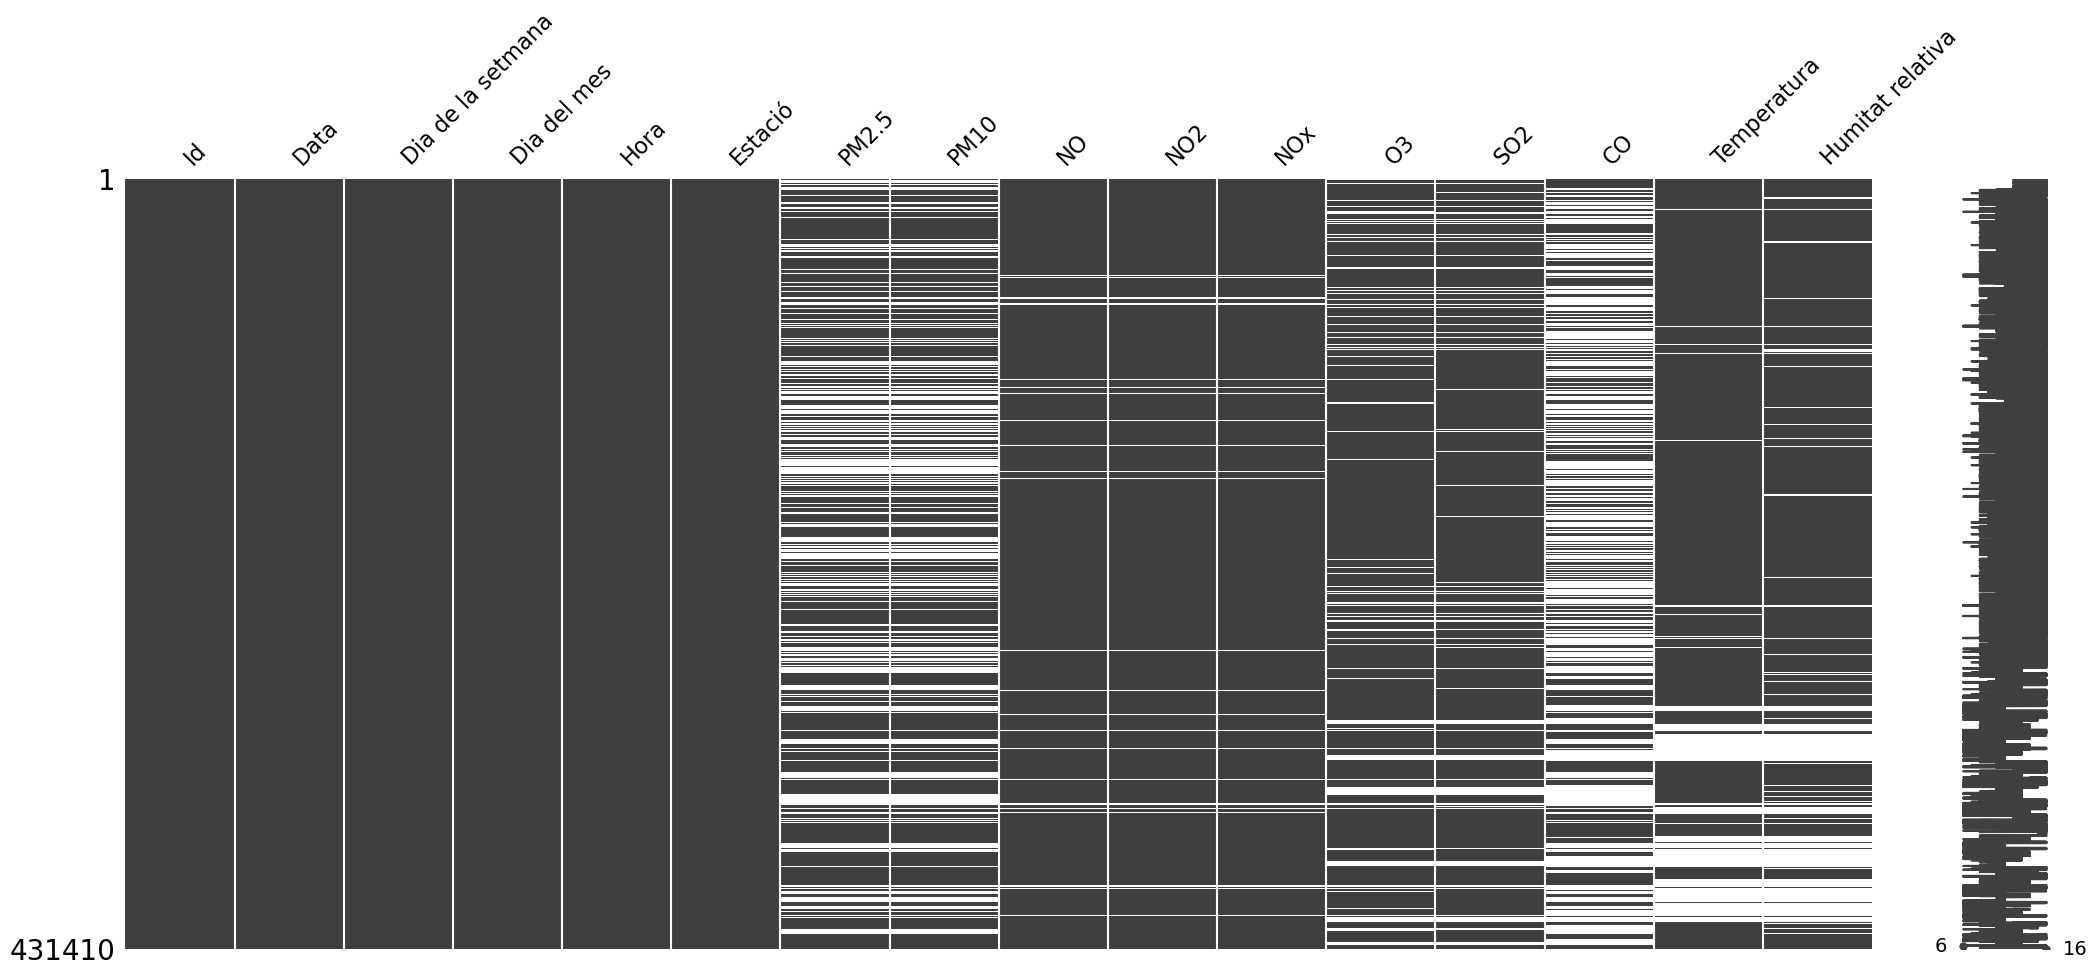

In [19]:
msno.matrix(df2[['Id', 'Data', 'Dia de la setmana', 'Dia del mes', 'Hora', 'Estació',
        'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'O3', 'SO2', 'CO', 'Temperatura', 'Humitat relativa']])